# Table of contents


# Direct Methods for the solution of Linear Systems.

In [17]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

np.random.seed(42) # for reproducibility

# Dimension N 
n = 3

# Generate a random matrix A (n x n)
A = np.random.rand(n, n)

# Generate the true vector x_true (n x 1)
x_true = np.ones((n, 1))

### 1.1) Computes the right-hand side of the linear system b = Ax_{true}.

In [2]:
b = np.dot(A, x_true)

### 1.2) Computes the condition number in 2-norm of the matrix A

In [4]:
cond_number = np.linalg.cond(A, 2)
cond_number

65.97601011809677

##### 1.2.1) Is it ill-conditioned ?

**We can see that the condition number is not very large and so we can say it is not ill-conditioned**

##### 1.2.2) What if we use the ∞-norm instead of the 2-norm?

In [5]:
cond_number = np.linalg.cond(A, np.inf)
cond_number

110.7839610298717

**The number is higher but not that much**

### 1.3) Solves the linear system Ax = b with the function `np.linalg.solve()`.

In [6]:
x = np.linalg.solve(A, b)

### 1.4) Computes the relative error between the solution computed before and the true solution xtrue.

In [7]:
E_xtrue_x = np.linalg.norm((x-x_true),2) / np.linalg.norm((x_true),2)

### 1.5) Plot a graph (using matplotlib.pyplot) with the relative errors as a function of n and (in a new window) the condition number in 2-norm K2(A) and in ∞-norm, as a function of n.

In [32]:
# General function
def plot_errors_conditions(matrix, n_range):
    relative_errors = []
    cond_norms_2 = []
    cond_norms_inf = []
    
    # Compute the errors and the conditional numbers
    for N in n_range:
        
        # Choose the function
        match matrix :
            case "random" : A_N = np.random.rand(N, N)
            case "vander" : A_N = np.vander(x=np.arange(1, N+1), N=N)
            case "hilbert" : A_N = scipy.linalg.hilbert(N)
            case _ : raise Exception("Unimplemented matrix type")
            
        x_true_N = np.ones((N, 1))
        b_N = A_N @ x_true_N
        x_N = np.linalg.solve(A_N, b_N)
        relative_errors.append(np.linalg.norm((x_N-x_true_N),2) / np.linalg.norm((x_true_N),2))
        cond_norms_2.append(np.linalg.cond(A_N, 2))
        cond_norms_inf.append(np.linalg.cond(A_N, np.inf))  
    
    # Plot them
    plt.figure(figsize=(20,10))
    
    # Relative 
    plt.subplot(121)
    plt.ylabel(r"E($x_{true}$, x)")
    plt.xlabel("Dimension")
    plt.title("Relative errors")
    plt.plot(list(n_range), relative_errors)
    
    # Condition numbers
    plt.subplot(122)
    plt.ylabel(r"$K(A)$")
    plt.xlabel("Dimension")
    plt.title("Condition numbers")
    plt.plot(list(n_range), cond_norms_2)
    plt.plot(list(n_range), cond_norms_inf)
    plt.legend([r'$K_2(A)$', r'$K_{inf}(A)$'])
    
    plt.show()
    
    

### 2.1) Test the program above with A as a random matrix (created with the function `np.random.rand()`) with size varying with $n = {10,20,30,...,100}$.

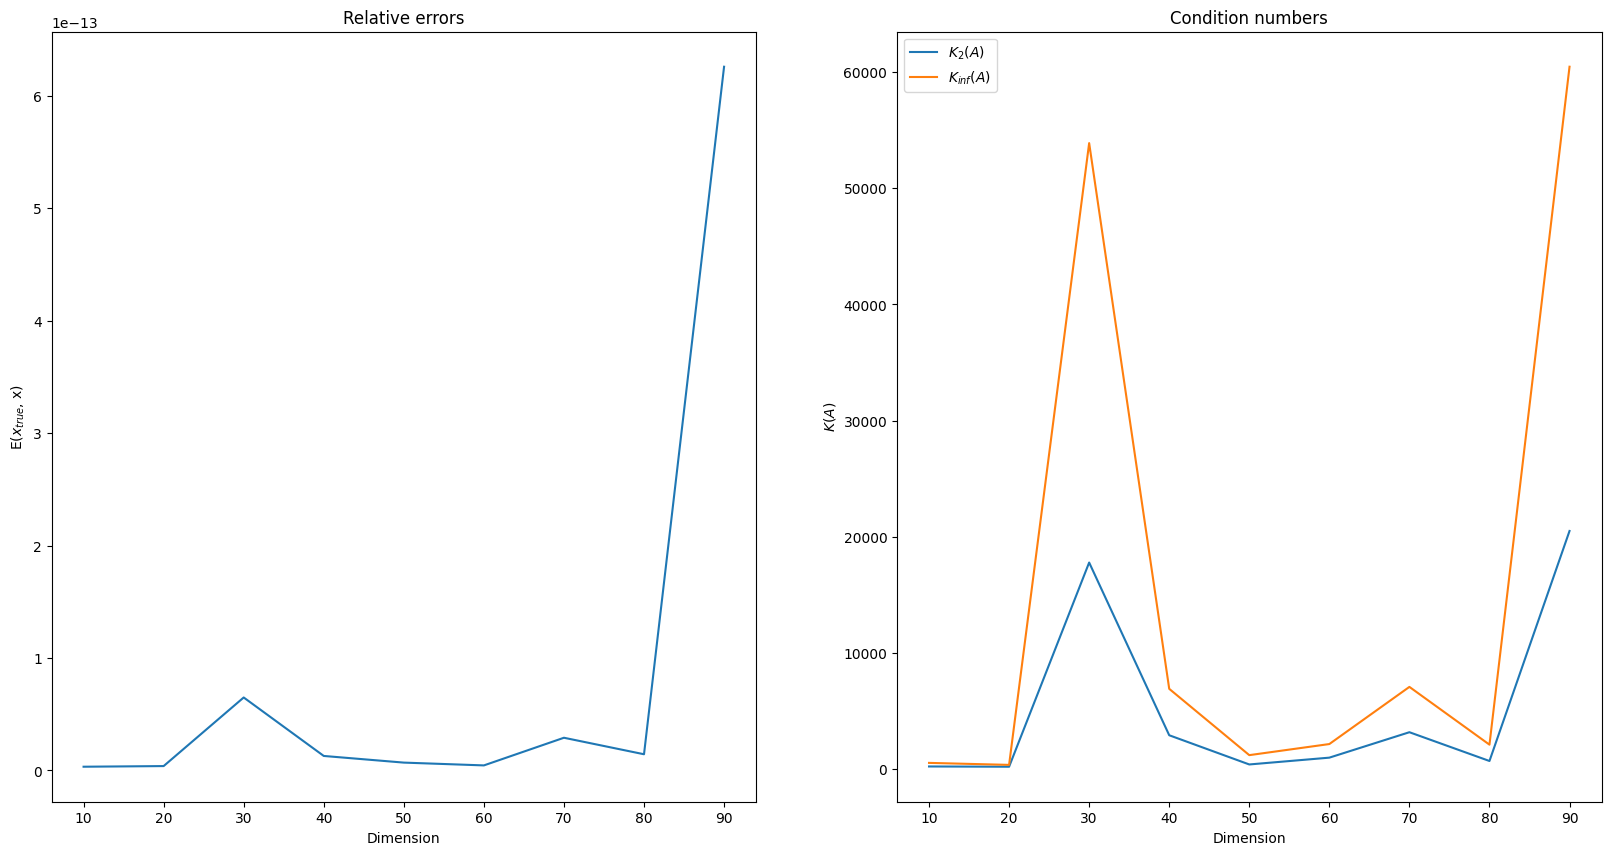

In [29]:
plot_errors_conditions("random", range(10, 100, 10))

### 2.2) The Vandermonde matrix (`np.vander`) of dimension $n = {5,10,15,20,25,30}$ with respect to the vector $x = {1,2,3,...,n}$

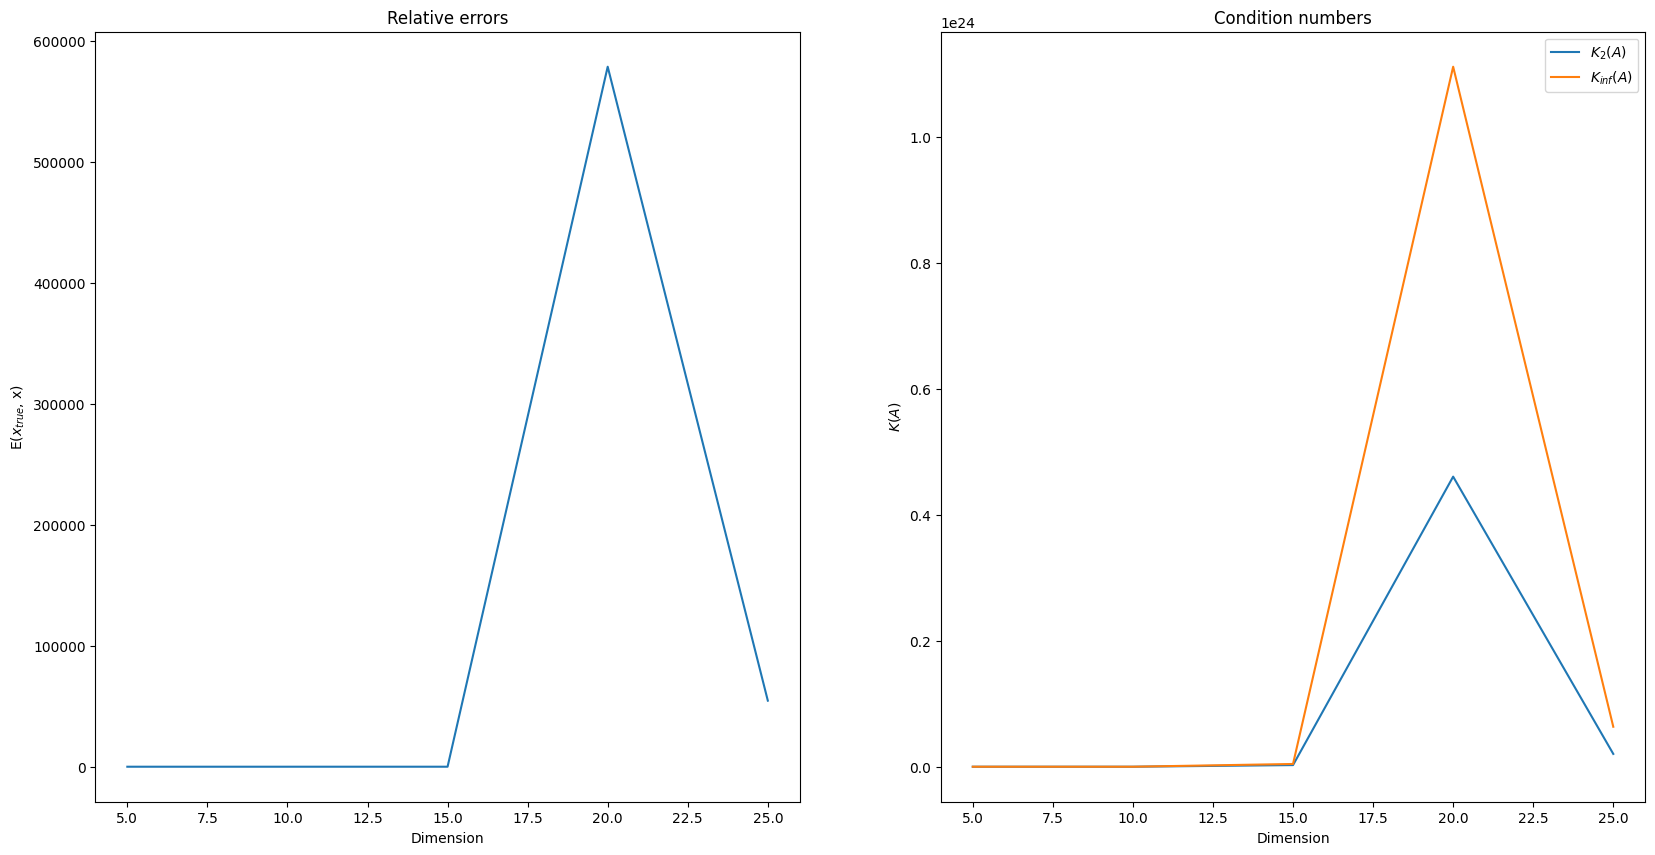

In [34]:
plot_errors_conditions("vander", range(5, 30, 5))

### 2.3) The Hilbert matrix (`scipy.linalg.hilbert`) of dimension $n = {4,5,6,...,12}$.

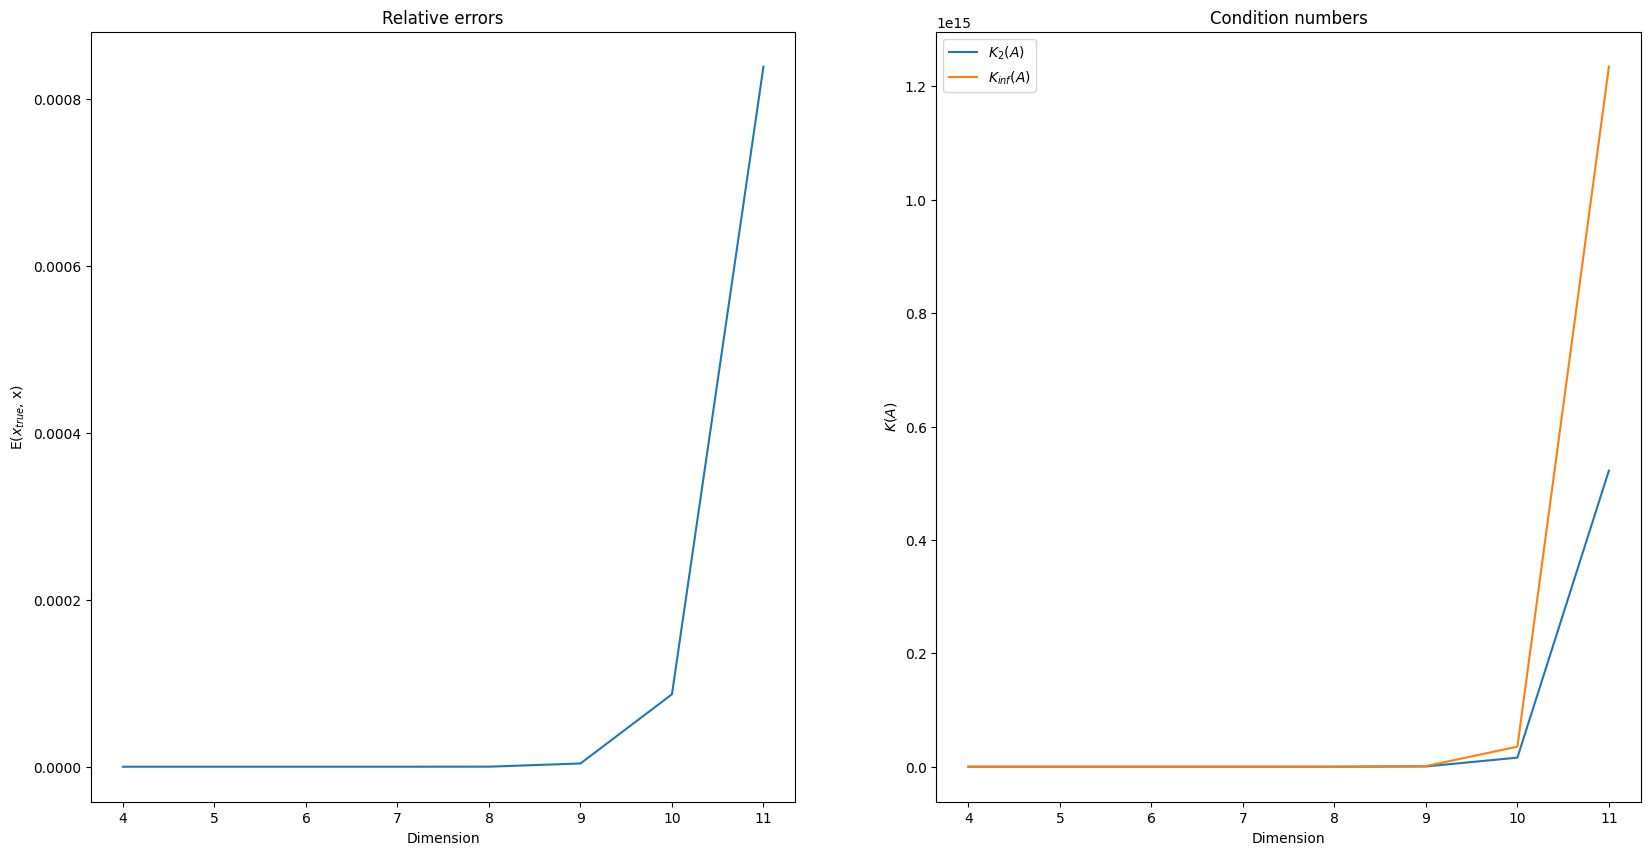

In [35]:
plot_errors_conditions("hilbert", range(4, 12))

# Floating Point Arithmetic

### 1) The Machine epsilon is the distance between 1 and the next floating point number. Compute epsilon

In [36]:
eps = 1.0

while 1.0 + eps > 1.0:
    eps /= 2.0

print(f"The smallest epsilon is {eps*2}")

The smallest epsilon is 2.220446049250313e-16


### 2) Let’s consider the sequence $a_n = (1 + \frac{1}{n})^n$. It is well known that: $\lim_{n→∞}a_n = e$ where e is the Euler costant. Choose different values for $n$, compute an and compare it to the real value of the Euler costant. What happens if you choose a large value of n? Guess the reason

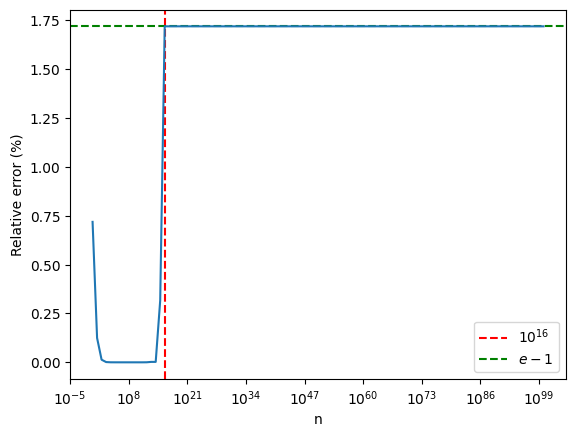

In [51]:
computed_e = []
real_e = np.exp(1)
n = 1
n_range = []

while n < 10e100:
    computed_e.append((1 + 1/n)**n)
    n_range.append(n)
    n *= 10

relative_error = [abs(e - real_e) for e in computed_e]

plt.xlabel('n')
plt.ylabel('Relative error (%)')
plt.axvline(x=10**16, color='r', linestyle='--', label=r'$10^{16}$')
plt.axhline(y=np.e-1, color='g', linestyle='--', label=r'$e-1$')
plt.plot(n_range, relative_error)
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.legend()
plt.show()

**This happens because $1 + \frac{1}{n}=1$ when when $\frac{1}{n} < \epsilon \rightarrow$ in fact the error is exactly $e-1$**

We can notice that the relative error seems to tend to 0% the higher the n becomes, as we would except from the mathematical limit.

But when we reach really high values, like 10^15, we observe a rapid increment if the error and then a relative high decrement which will be stable around -60%, an error rate we can't ignore.

I explain this phenomenon by observing that the higher n becomes, the smaller becomes 1/n and this leads to error in the representation of the floating point which has a limit.
The error remains while doing 1-1/n bit then it mostly intesifies when the error got elevated to the power of n. 

So, once we face the limit of representation of the floating point, we notice a high and quick error rate (exponential)

### 3.1) Compute the rank of A and B and their eigenvalues. 
- Tips: Please, have a look at `np.linalg`

In [49]:
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

# Rank of matrices A and B
rank_A = np.linalg.matrix_rank(A); print(f"Rank(A)={rank_A}")
rank_B = np.linalg.matrix_rank(B); print(f"Rank(B)={rank_B}")

# Eigenvalues of matrices A and B
eigenvalues_A = np.linalg.eigvals(A); print(f"The eigenvalues of A are {eigenvalues_A}")
eigenvalues_B = np.linalg.eigvals(B); print(f"The eigenvalues of B are {eigenvalues_B}")

Rank(A)=2
Rank(B)=1
The eigenvalues of A are [5. 2.]
The eigenvalues of B are [5. 0.]


### 3.2) Are A and B full-rank matrices? Can you infer some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate your deduction with other examples.

- A is full-rank and doesn't have a 0 among the eigenvalues
- B is not full-rank and has a 0 among the eigenvalues

`A square matrix is full rank if and only if all of its eigenvalues are non-zero.`

In order to demonstrate that we provide 2 other set of examples:

In [50]:
# Example 1
A = np.array([[3, 1], [2, 4]])
B = np.array([[2, 1], [2, 1]])

# Rank of matrices A and B
rank_A = np.linalg.matrix_rank(A); print(f"Rank(A)={rank_A}")
rank_B = np.linalg.matrix_rank(B); print(f"Rank(B)={rank_B}")

# Eigenvalues of matrices A and B
eigenvalues_A = np.linalg.eigvals(A); print(f"The eigenvalues of A are {eigenvalues_A}")
eigenvalues_B = np.linalg.eigvals(B); print(f"The eigenvalues of B are {eigenvalues_B}")


Rank(A)=2
Rank(B)=1
The eigenvalues of A are [2. 5.]
The eigenvalues of B are [3. 0.]


In [51]:
# Example 2
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 2], [2, 4]])

# Rank of matrices A and B
rank_A = np.linalg.matrix_rank(A); print(f"Rank(A)={rank_A}")
rank_B = np.linalg.matrix_rank(B); print(f"Rank(B)={rank_B}")

# Eigenvalues of matrices A and B
eigenvalues_A = np.linalg.eigvals(A); print(f"The eigenvalues of A are {eigenvalues_A}")
eigenvalues_B = np.linalg.eigvals(B); print(f"The eigenvalues of B are {eigenvalues_B}")

Rank(A)=2
Rank(B)=1
The eigenvalues of A are [-0.37228132  5.37228132]
The eigenvalues of B are [0. 5.]
